last one 3518208526195.998


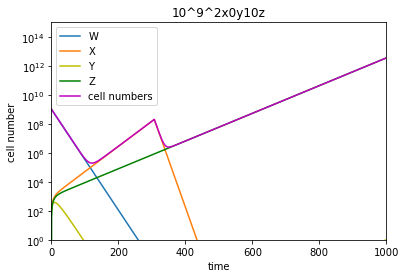

In [2]:
#!/usr/bin/python

import numpy as np #use numpy
from scipy.integrate import odeint #use odeint from scipy.integrate
import matplotlib.pyplot as plt #use matplotlib.pyplot,draw the picture

def func(x, t, *arg):
   # (r, k) = arg #define parameter
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] #caculate dv/dt
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    
    return np.array([dw, dx, dy, dz]) 

initial_N = 10**9
t_end = 1000
tan = 307

list_t = np.arange(0, tan, 0.01) # time zone of drug A
list_t1 = np.arange(tan, t_end, 0.01) #time zone of drug B

aA = -0.08
bA = 0.04
cA = -0.13
fA = 0.022
gA = hA = kA = pA = qA =0.0000001
paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA )

cell_init = (initial_N - 10**2 - 10**2, 10**2, 10**2, 0)
cells = odeint(func, cell_init, list_t, args = paramsA)
i = len(list_t)-1
cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]

aB = -0.1
bB = -0.15
cB = 0.024
fB = 0.022
gB = hB = kB = pB = qB =0.0000001
paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB )

cell1 = odeint(func, cell1_init, list_t1, args = paramsB)

lastone = list()
celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
lastone = celltotal1[-1]
print ("last one", lastone)
#v = odeint(func, v_init, list_t, args=params) #output list:V[v0, v1,v2,v3...v100]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 0], cell1[:, 0])), label='W')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 1], cell1[:, 1])), label='X')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 2], cell1[:, 2])), 'y', label='Y')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 3], cell1[:, 3])), 'g', label='Z')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((celltotal, celltotal1)), 'm', label='cell numbers')
ax.legend()

ax.set_yscale('log')
ax.set_xlim(0, 1000)
ax.set_ylim(1, 10**15)
ax.set_xlabel('time')
ax.set_ylabel('cell number')
ax.set_title('10^9^2x0y10z')
#ax.plot(v[:, 0], v[:, 1])
#ax.set_xlabel('Sp1')
#ax.set_ylabel('Sp2')

# print (lastone, 'test')
plt.show()